In [1]:
import pandas as pd
import numpy as np

## Load Titanic Data

In [2]:
df = pd.read_csv("data/titanic/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Select Features / Target

In [6]:
features = ["Sex", "Age", "Fare", "Pclass", "SibSp",  "Parch", "Embarked"]
X = df[features].copy()
y = df["Survived"]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Pclass      891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


In [8]:
## To Emphasise One hot encoding, I am going to fill the missing values of Embarked with Frequently used values
## Also since only to values of Embarked are missing, I am going to fill it with Most common Embarked Station

In [9]:
X.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
X["Embarked"] = X["Embarked"].fillna("S")

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Pclass      891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


In [12]:
X.head(2)

,Sex,Age,Fare,Pclass,SibSp,Parch,Embarked
0,male,22.0,7.2500,3,1,0,S
1,female,38.0,71.2833,1,1,0,C


## Pre-Processing Modules in Scikit-learn

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, Imputer, FunctionTransformer
from sklearn.preprocessing import  OneHotEncoder, Imputer, StandardScaler, LabelBinarizer, LabelEncoder

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
## Make a Pipeline of 

In [16]:
## Encode Values - Pclass, Sex and Embarked

In [17]:
# One Hot Encode Pclass

class_encoder = OneHotEncoder(sparse=False)
class_encoder.fit_transform(X[["Pclass"]])[:5]

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [18]:
# One Hot Encoding doesn't work on Text Data
gender_encoder = OneHotEncoder(sparse=False)
gender_encoder.fit_transform(X[["Embarked"]])[:5]

ValueError: could not convert string to float: 'Q'

### Unfortunately One Hot Encoder Doesn't work with Categorical Values :-(

In [19]:
### Let's try Label Encoder and Label Binarizer

In [20]:
gender_encoder = LabelEncoder()
gender_encoder.fit_transform(X["Sex"])[:5]

array([1, 0, 0, 0, 1])

In [21]:
## Let's do the same for Embarked Station

embarked_encoder = LabelEncoder()
embarked_values = embarked_encoder.fit_transform(X["Embarked"])[:5]
embarked_values

array([2, 0, 2, 2, 2])

In [22]:
## We will then need to pass those values to One Hot Encoder to encode into binary values

### Label Encoding and One Hot Encoding in one step via LabelBinarizer

In [23]:
embarked_encoder = LabelBinarizer()
embarked_encoder.fit_transform(X["Embarked"])[:5]

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

### OK.  That looks good.  Let's put these together in a Pipeline

In [24]:
make_pipeline(LabelEncoder(), LogisticRegression()).fit(X[["Sex"]], y)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

### Label Encoders Don't work with Pipelines :-(

## Why?

### Github Issues:
    * https://github.com/scikit-learn/scikit-learn/pull/7327
    * https://github.com/scikit-learn/scikit-learn/pull/7375
    
**Note**: Looks like they are looking to fix OneHotEncoding to take Categorical Values in Version 0.19 instead of fixing LabelEcoders to work with pipelines

### For now, We need to go back to Pandas and encode Gender and Embarked to Numbers before using OneHotEncoder

In [25]:
# encode string features as numbers
X['Sex'] = X['Sex'].map({"male": 1, "female": 0})
X['Embarked'] = X['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})

X.head(5)

,Sex,Age,Fare,Pclass,SibSp,Parch,Embarked
0,1,22.0,7.2500,3,1,0,1
1,0,38.0,71.2833,1,1,0,2
2,0,26.0,7.9250,3,0,0,1
3,0,35.0,53.1000,1,1,0,1
4,1,35.0,8.0500,3,0,0,1


### Now we can put them all together in a Pipeline :-)

In [26]:
Pipeline([
        ("features", OneHotEncoder()),   # One Hot Encode Values
        ("model", LogisticRegression())  # Model
        ]).fit(X[["Pclass", "Sex", "Embarked"]], y)

Pipeline(steps=[('features', OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

## Let's add other Features as well using FeatureUnion and make one Pipeline

In [27]:
from column_selector import ColumnSelector, ColumnImputer

In [28]:
from sklearn.model_selection import train_test_split

## Also Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
feature_mapper = make_union(
    make_pipeline(ColumnSelector(["Pclass", "Sex", "Embarked"]), OneHotEncoder()),
    make_pipeline(ColumnSelector(["Age", "Fare"]), Imputer(), StandardScaler()),  # Mean Zero
    ColumnSelector(["SibSp", "Parch"])
)

# Put the combined Features into a Pipeline
model_pipe = Pipeline([
        ("features", feature_mapper),   # Combined Features
        ("model", LogisticRegression())  # Model
        ]).fit(X_train, y_train)

print("Accuracy Score on Test Data: {:.3f}".format(model_pipe.score(X_test, y_test)))

Accuracy Score on Test Data: 0.812


## Hurray - We Put it all together in a Pipeline

#### But can we do better and not have to manually convert Labels into Numbers before passing into OneHotEncoder?

## Enter Sklearn-Pandas

In [30]:
#! pip install sklearn-pandas

In [31]:
from sklearn_pandas import DataFrameMapper

import warnings
warnings.filterwarnings("ignore")

/Users/rameshsampath/miniconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rameshsampath/miniconda2/envs/py35/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [32]:
features = ["Sex", "Age", "Fare", "Pclass", "SibSp",  "Parch", "Embarked"]
X = df[features].copy()
y = df["Survived"]

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

X.head(2)

,Sex,Age,Fare,Pclass,SibSp,Parch,Embarked
0,male,22.0,7.2500,3,1,0,S
1,female,38.0,71.2833,1,1,0,C


In [33]:
mapper = DataFrameMapper([
                (["Pclass"], OneHotEncoder()),
                (["Sex"], LabelEncoder()),
                (["Age", "Fare"], [Imputer(strategy="mean"), StandardScaler()]),
                ("Embarked", [ColumnImputer(strategy="most_frequent"), LabelBinarizer()]),
                (["SibSp", "Parch"], None)  # No Transformations necessary
            ])

pipeline = Pipeline(steps=[
        ("features", mapper),
        ("model", LogisticRegression())
    ])

pipeline.fit(X_train, y_train)

print("Accuracy Score on Test Data: {:.3f}".format(pipeline.score(X_test, y_test)))

Accuracy Score on Test Data: 0.825


### Awesome.  We were able to use LibaryBinarizer and Encoder without having to convert to Numbers

## Feature Engineering 

* Polynomial Features
* Dimensionality Reduction
* Feature Selection

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

In [35]:
pipeline = Pipeline(steps=[
        ("features", mapper),
        ("selection", PCA(n_components=0.95)),
        ("model", LogisticRegression())
    ])

pipeline.fit(X_train, y_train)

print("Accuracy Score on Test Data: {:.3f}".format(pipeline.score(X_test, y_test)))

Accuracy Score on Test Data: 0.834


## Put them all Together and Grid Search for Hyper Parameter Tuning

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

In [37]:
pipeline = Pipeline(steps=[
        ("features", mapper),
        ("rf_model", RandomForestClassifier())
    ])

params = {
    "rf_model__n_estimators": [10, 100, 200],
    "rf_model__min_samples_leaf": [1, 3, 5],
    "rf_model__max_depth": [None, 10, 7, 5, 3]
}

grid = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=5, n_jobs=-1)

grid.fit(X_train, y_train)
print("Best Parameters: ", grid.best_params_)
print("Accuracy Score on Test Data: {:.3f}".format(grid.score(X_test, y_test)))

Best Parameters:  {'rf_model__max_depth': 10, 'rf_model__min_samples_leaf': 5, 'rf_model__n_estimators': 200}
Accuracy Score on Test Data: 0.830


## Load UCI Income Dataset

In [38]:
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "maritial_status", "occupation", "relationship",
          "race", "sex", "capital_gain", "capital_loss", "", "native_country", "income"]

In [39]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, names=columns)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
education_num      32561 non-null int64
maritial_status    32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
capital_gain       32561 non-null int64
capital_loss       32561 non-null int64
                   32561 non-null int64
native_country     32561 non-null object
income             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [41]:
features = ["age", "workclass", "education_num", "maritial_status", "occupation", "relationship",
          "race", "sex", "native_country", "income"]

X = df[features]
y = df["income"]

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

X.sample(2)

,age,workclass,education_num,maritial_status,occupation,relationship,race,sex,native_country,income
10382,22,State-gov,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
13776,64,Local-gov,9,Widowed,Other-service,Unmarried,White,Female,United-States,<=50K


## Put togehter a Pipeline

* We can Encode the Categories into Numbers (via Pandas - Map and Replace)
* Then put them in a Pipeline

OR

#### Just use SKLearn-Pandas

In [42]:
mapper = DataFrameMapper([
                ("workclass", LabelBinarizer()),
                ("maritial_status", LabelBinarizer()),
                ("occupation", LabelBinarizer()),
                ("relationship", LabelBinarizer()),
                ("race", LabelBinarizer()),
                ("sex", LabelBinarizer()),
                ("native_country", LabelBinarizer()),
                ("workclass", LabelBinarizer()),
                ("workclass", LabelBinarizer()),
                (["age", "education_num"], None)  # No Transformations necessary
            ])

pipeline = Pipeline(steps=[
        ("features", mapper),
        ("model", LogisticRegression())
    ])

pipeline.fit(X_train, y_train)

print("Accuracy Score on Test Data: {:.3f}".format(pipeline.score(X_test, y_test)))

Accuracy Score on Test Data: 0.831


## Text Example - Ham vs Spam

* UCI Dataset - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [43]:
df = pd.read_csv("data/smsspamcollection/SMSSpamCollection", sep="\t", header=None, names=["target", "text"])

In [44]:
X = df["text"]
y = df["target"]

In [45]:
y.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [46]:
# Convert Target to Int 0/1
y = (y == "spam").astype(int)

In [47]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn import metrics

In [49]:
# Build a Model
log_reg_model = Pipeline(steps=[
        ("vect", CountVectorizer()), 
        ("model", LogisticRegression())
        ])

In [50]:
log_reg_model.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

## Model Accuracy

In [51]:
# Predictions
y_pred = log_reg_model.predict(X_test)

In [52]:
# Accuracy
log_reg_model.score(X_test, y_test)

0.98504784688995217

In [53]:
# Confusion Matrix
metrics.confusion_matrix(y_test, y_pred)

array([[1445,    3],
       [  22,  202]])

## ROC / AUC

In [54]:
y_pred_prob = log_reg_model.predict_proba(X_test)

In [55]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob[:, 1])

In [56]:
roc_auc = metrics.auc(fpr, tpr)

In [57]:
from matplotlib import pyplot as plt

%matplotlib inline

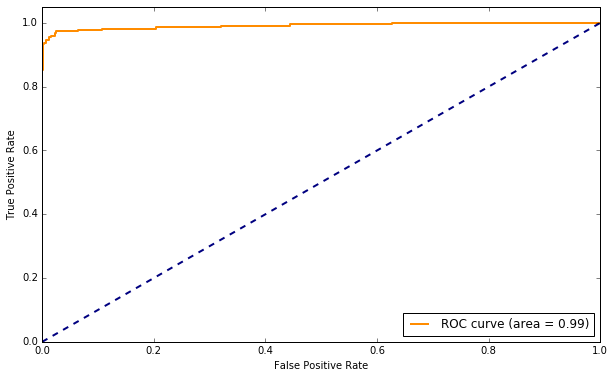

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right");

## Precision - Recall Curve

In [60]:
### Precision / Recall
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1448
          1       0.99      0.90      0.94       224

avg / total       0.99      0.99      0.98      1672



In [62]:
y_pred_prob = log_reg_model.predict_proba(X_test)

In [63]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_pred_prob[:, 1])

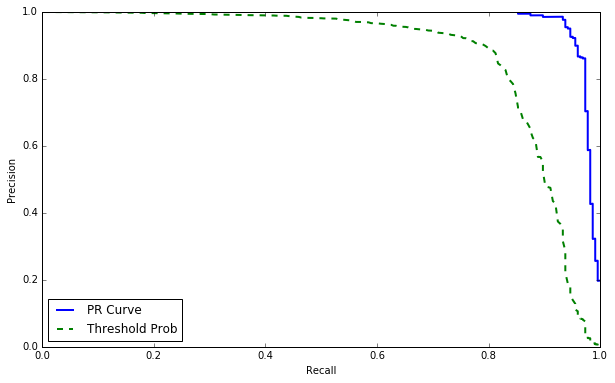

In [66]:
# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='PR Curve', lw=2)
plt.plot(recall[1:],threshold, 'g--', lw=2, label="Threshold Prob") # threshold 
plt.legend(loc="lower left")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0,1])
plt.ylim([0,1]);

### Scikit-Learn Pipelines make it easy to keep Feature Engineering and Model building together.  Use them.